In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
import re
import warnings
warnings.filterwarnings("ignore")
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sujay1844/used-car-prices")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pratik\.cache\kagglehub\datasets\sujay1844\used-car-prices\versions\3


In [6]:
path=r'C:\Users\pratik\.cache\kagglehub\datasets\sujay1844\used-car-prices\versions\3'
files=os.listdir(path)
df=pd.read_csv(os.path.join(path,files[0]))
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5847 non-null   object 
 1   Location           5847 non-null   object 
 2   Year               5847 non-null   int64  
 3   Kilometers_Driven  5847 non-null   int64  
 4   Fuel_Type          5847 non-null   object 
 5   Transmission       5847 non-null   object 
 6   Owner_Type         5847 non-null   object 
 7   Mileage            5845 non-null   object 
 8   Engine             5811 non-null   object 
 9   Power              5811 non-null   object 
 10  Seats              5809 non-null   float64
 11  New_Price          815 non-null    object 
 12  Price              5847 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 594.0+ KB


In [8]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

In [9]:
df.nunique()

Name                 1804
Location               11
Year                   22
Kilometers_Driven    3019
Fuel_Type               3
Transmission            2
Owner_Type              4
Mileage               419
Engine                140
Power                 361
Seats                   8
New_Price             534
Price                1366
dtype: int64

In [10]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [11]:
df['Location'].unique()

array(['Pune', 'Chennai', 'Coimbatore', 'Jaipur', 'Mumbai', 'Kochi',
       'Kolkata', 'Delhi', 'Bangalore', 'Hyderabad', 'Ahmedabad'],
      dtype=object)

In [12]:
df['Owner_Type'].value_counts()

First             4811
Second             925
Third              103
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [13]:
df['Year'].min()

1998

In [14]:
df['Kilometers_Driven'].max()

6500000

In [15]:
df.shape

(5847, 13)

In [16]:
df['Fuel_Type'].value_counts()

Diesel      3161
Petrol      2684
Electric       2
Name: Fuel_Type, dtype: int64

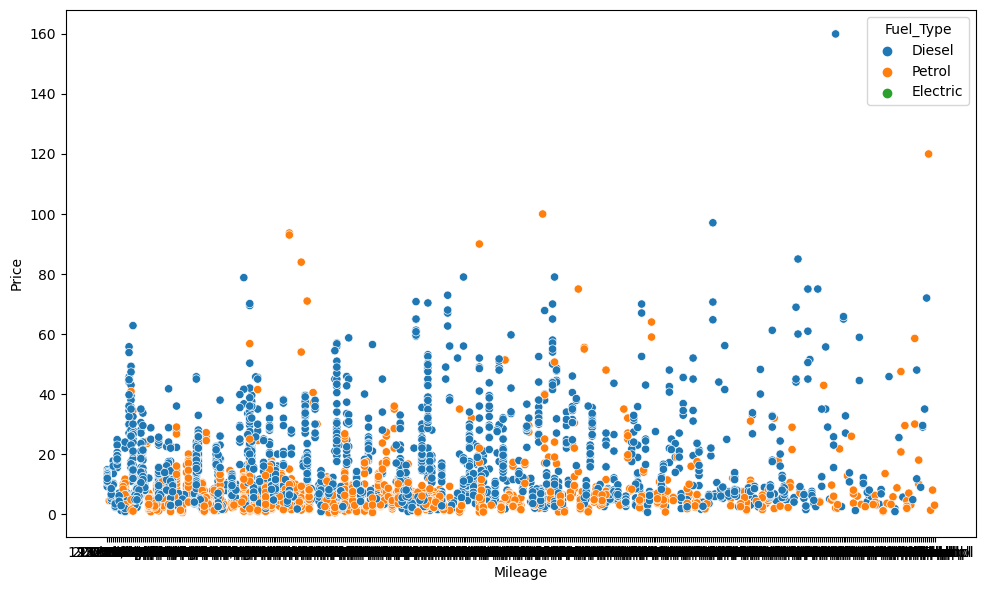

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Mileage'],y=df['Price'],hue=df['Fuel_Type'])

<AxesSubplot:xlabel='Price', ylabel='Engine'>

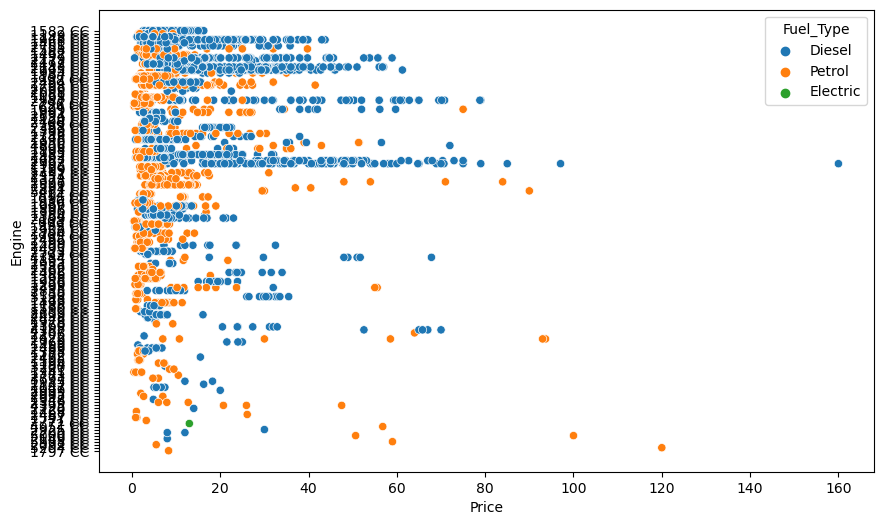

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Price'],y=df['Engine'],hue=df['Fuel_Type'])

In [19]:
df['age']=2024-df['Year']
df.drop(['Year','New_Price'],axis=1,inplace=True)

Text(0.5, 1.0, 'Distrubution of car with diffrent age')

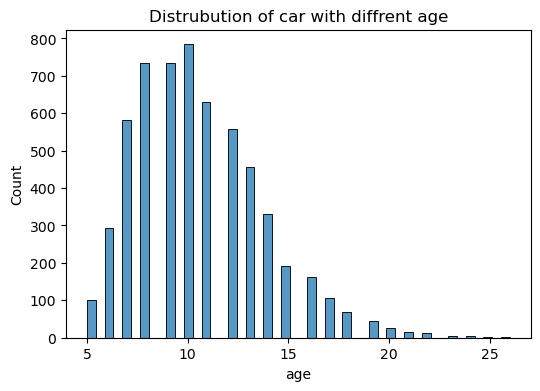

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'])
plt.title('Distrubution of car with diffrent age')

<AxesSubplot:>

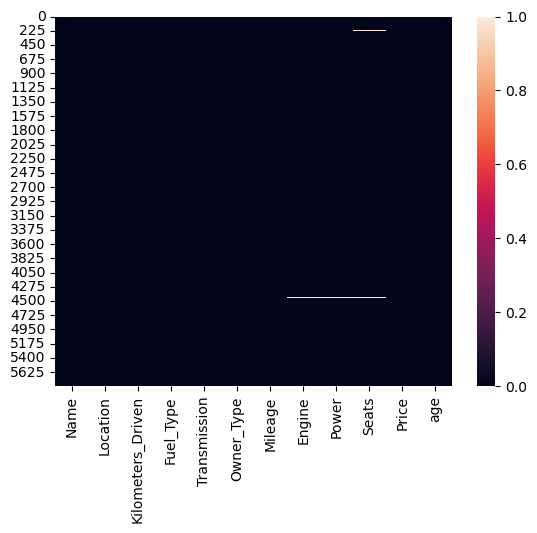

In [21]:
sns.heatmap(df.isna())

<AxesSubplot:>

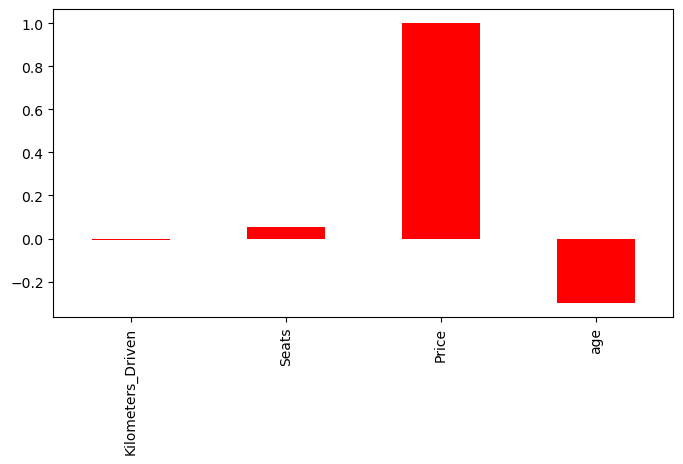

In [22]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corrwith(df['Price']).plot(kind='bar',color='red',figsize=(8,4))

In [23]:
def extract_features(df,col,position):
    df[col]=df[col].apply(lambda x:x.split()[position] if isinstance(x, str) and x != 'nan' else x)

In [24]:
cols=['Name','Mileage','Engine','Power']
for col in cols:
    extract_features(df,col,0)


In [25]:
def transform_features(col,encoder):
  df[col]=encoder.fit_transform(df[[col]])

In [26]:
from sklearn.preprocessing import OrdinalEncoder
cols=['Name','Transmission','Location','Fuel_Type','Owner_Type']
encoders={}
for col in cols:
    encoders[col]=OrdinalEncoder()
    df[col]=encoders[col].fit_transform(df[[col]])

In [28]:
df['Price']=df['Price'].apply(lambda x:x*100000)


In [29]:
df

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,age
0,10.0,10.0,41000,0.0,1.0,0.0,19.67,1582,126.2,5.0,1250000.0,9
1,9.0,2.0,46000,2.0,1.0,0.0,13,1199,88.7,5.0,450000.0,13
2,18.0,2.0,87000,0.0,1.0,0.0,20.77,1248,88.76,7.0,600000.0,12
3,1.0,3.0,40670,0.0,0.0,2.0,15.2,1968,140.8,5.0,1774000.0,11
4,22.0,6.0,86999,0.0,1.0,0.0,23.08,1461,63.1,5.0,350000.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
5842,18.0,4.0,27365,0.0,1.0,0.0,28.4,1248,74,5.0,475000.0,10
5843,10.0,6.0,100000,0.0,1.0,0.0,24.4,1120,71,5.0,400000.0,9
5844,17.0,6.0,55000,0.0,1.0,2.0,14.0,2498,112,8.0,290000.0,12
5845,18.0,8.0,46000,2.0,1.0,0.0,18.9,998,67.1,5.0,265000.0,11


In [30]:
train_data_numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'age']
for column in train_data_numerical_columns:
    print('Skewness of', column, 'before outlier treatment: ', df[column].skew())

Skewness of Kilometers_Driven before outlier treatment:  58.304361239485544
Skewness of Mileage before outlier treatment:  -0.30921582730965225
Skewness of Engine before outlier treatment:  1.4087748575132122
Skewness of Power before outlier treatment:  1.9155740661837346
Skewness of age before outlier treatment:  0.829742463654287


In [31]:
x=df.drop('Price',axis=1)
y=df['Price']

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [34]:
def train(model,x_train,y_train,x_test,y_test):
    train=model
    train.fit(x_train,y_train)
    pred=train.predict(x_test)
    print('='*35)
    print(model)
    print('-'*35)
    mse=mean_squared_error(y_test,pred)
    r2=r2_score(y_test,pred)
    print('R2 Score',r2)
    print('Mean Squared Error',mse)
    print('RSME',math.sqrt(mse))
    print('-'*35)
    print('='*35)

In [35]:
model=XGBRegressor()
train(model,x_train,y_train,x_test,y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
-----------------------------------
R2 Score 0.9004967148355054
Mean Squared Error 113890043616.75252
RSME 337475.9896892704
-----------------------------------


In [36]:
param_grid={'n_estimators':[10,50,100],
      'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]}

In [37]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,param_grid,cv=5)
grid.fit(x_train,y_train)


[14:52:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:52:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:52:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:52:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[14:52:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "m

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [38]:
grid.best_params_

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}

In [39]:
model=XGBRegressor(max_depth=5,min_samples_split=2,n_estimators=100)
train(model,x_train,y_train,x_test,y_test)

[14:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, min_samples_split=2, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)
-----------------------------------
R2 Score 0.914317

In [40]:
import pickle
with open('used_car_evaluation_model.pkl','wb') as f:
    pickle.dump(model,f)

In [41]:
with open('used_car_evauluation_scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [42]:
with open('used_car_evauluation_encoders.pkl','wb') as f:
    pickle.dump(encoders,f)